# Data Wrangling of Fremont Bridge's data set

### Import Fremont Bridge's data into local directory

In [2]:
#import urllib.request as req
#req.urlretrieve('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', 'data/FremontBridge.csv')

('data/FremontBridge.csv', <http.client.HTTPMessage at 0x7defda7648b0>)

### Load Data and  start exploring

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
sns.set()

In [5]:
fb = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)

In [6]:
print(fb.head(5))
print(fb.tail(5))

                     Fremont Bridge Sidewalks, south of N 34th St  \
Date                                                                
2022-08-01 00:00:00                                          23.0   
2022-08-01 01:00:00                                          12.0   
2022-08-01 02:00:00                                           3.0   
2022-08-01 03:00:00                                           5.0   
2022-08-01 04:00:00                                          10.0   

                     Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  \
Date                                                                                      
2022-08-01 00:00:00                                                7.0                    
2022-08-01 01:00:00                                                5.0                    
2022-08-01 02:00:00                                                0.0                    
2022-08-01 03:00:00                                          

In [7]:
fb.shape

(95640, 3)

In [8]:
fb.dtypes

Fremont Bridge Sidewalks, south of N 34th St                          float64
Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk    float64
Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk    float64
dtype: object

In [10]:
fb.columns = ['all','East','West']
fb.head(5)

,all,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [11]:
# fb['Total'] = fb['East'] + fb['West']
fb['Total'] = fb.eval('East + West')
fb.head(5)

,all,East,West,Total
Date,,,,
2022-08-01 00:00:00,23.0,7.0,16.0,23.0
2022-08-01 01:00:00,12.0,5.0,7.0,12.0
2022-08-01 02:00:00,3.0,0.0,3.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0,5.0
2022-08-01 04:00:00,10.0,2.0,8.0,10.0


In [12]:
# Check for null values
fb.isna().sum()

all      26
East     26
West     26
Total    26
dtype: int64

In [13]:
fb.dropna(inplace=True)
fb.count()

all      95614
East     95614
West     95614
Total    95614
dtype: int64

In [14]:
fb.describe()

,all,East,West,Total
count,95614.000000,95614.000000,95614.000000,95614.000000
mean,106.483036,47.184847,59.298189,106.483036
std,133.257293,60.166192,83.020651,133.257293
min,0.000000,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000,13.000000
50%,59.000000,27.000000,31.000000,59.000000
75%,144.000000,65.000000,76.000000,144.000000
max,1097.000000,698.000000,850.000000,1097.000000


Text(0, 0.5, 'Hourly Bicycle Count')

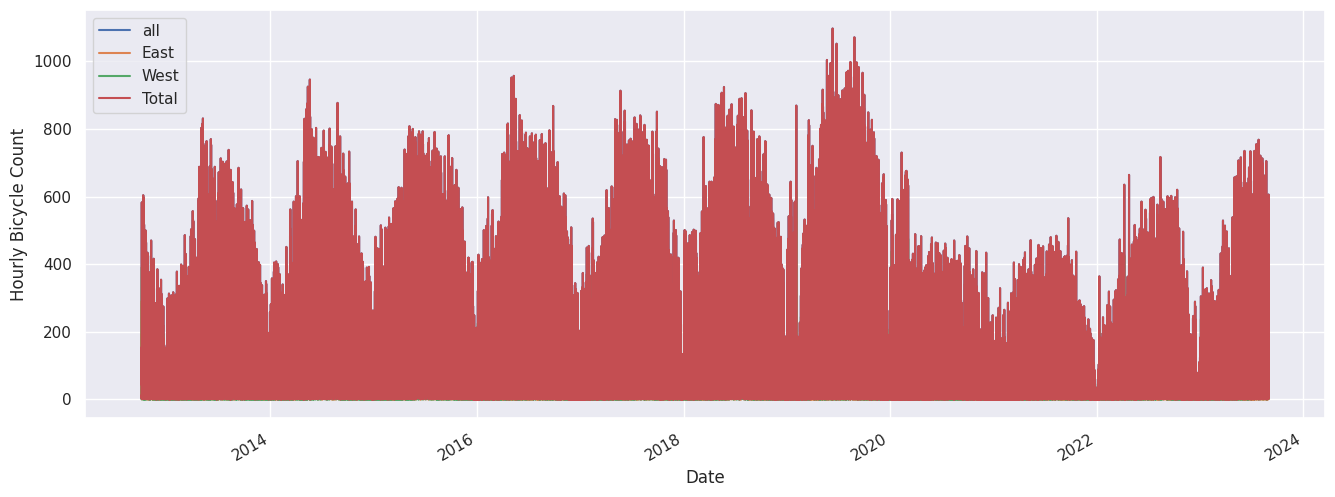

In [15]:
fb.plot(kind='line', figsize=(16,6))
plt.legend(loc='upper left')
plt.ylabel('Hourly Bicycle Count')
# Obsevation: The 30k+ samples are way too dense to make sense, because we hardly see East and West data ata the bottom.

fb_daily size : 15940


Text(0, 0.5, 'Daily Bicycle Count')

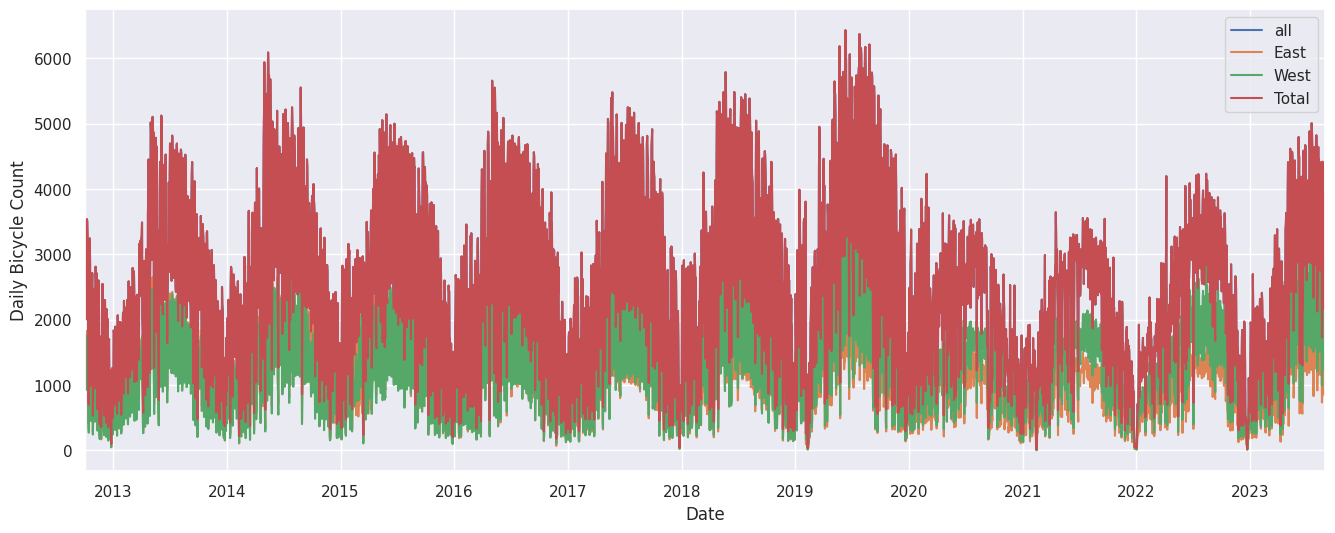

In [16]:
# How about if we resample the data from hourly to daily?
fb_daily = fb.resample('d').sum()
print('fb_daily size :',fb_daily.size)
fb_daily.plot(kind='line', figsize=(16,6))
plt.ylabel('Daily Bicycle Count')
# Observation: It's still dense with daily data.

fb_weekly size : 2280


Text(0, 0.5, 'Weekly Bicycle Count')

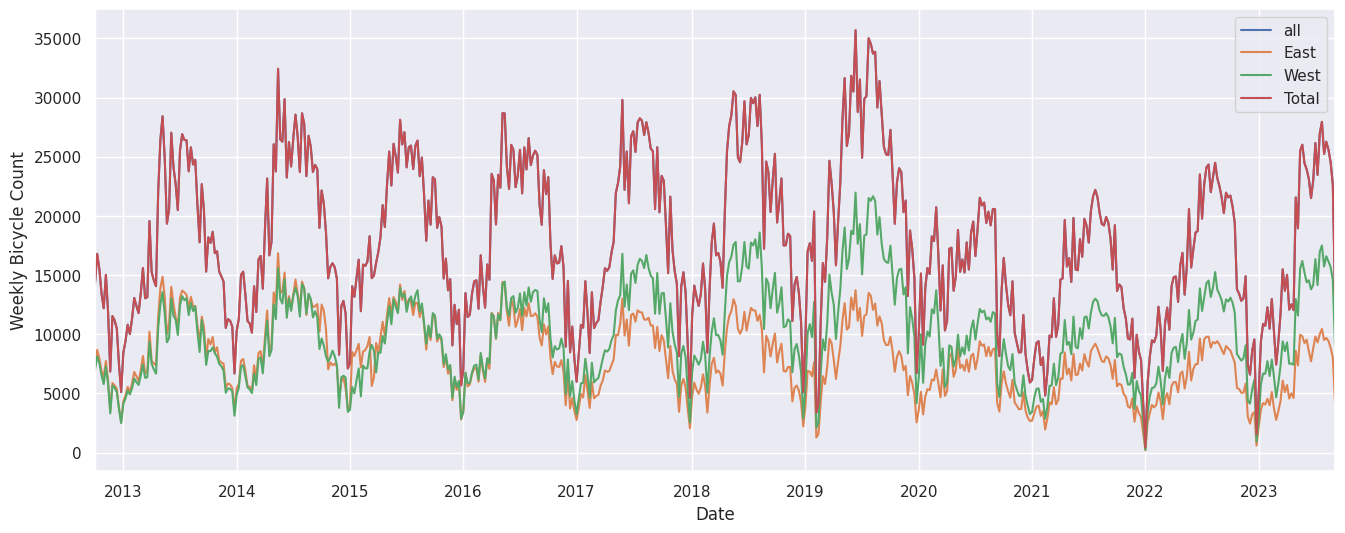

In [17]:
# How about if we resample the data from daily to weekly? 53 weeks a year isn't much dense after  all, right?
fb_weekly = fb_daily.resample('W').sum()
print('fb_weekly size :',fb_weekly.size)
fb_weekly.plot(kind='line', figsize=(16,6))
plt.ylabel('Weekly Bicycle Count')
# Observation: Life is better now..for data analysis
# The frequency line varies widely. What do we infer?
# People bicycle more in summer (see the peaks evevry year in the graph) than in winter
# Even within a season, there are wide-fluctuations than near-consistency in the counts from one week to another. Why?
# Perhaps because of temperature, precipitation and other factors..

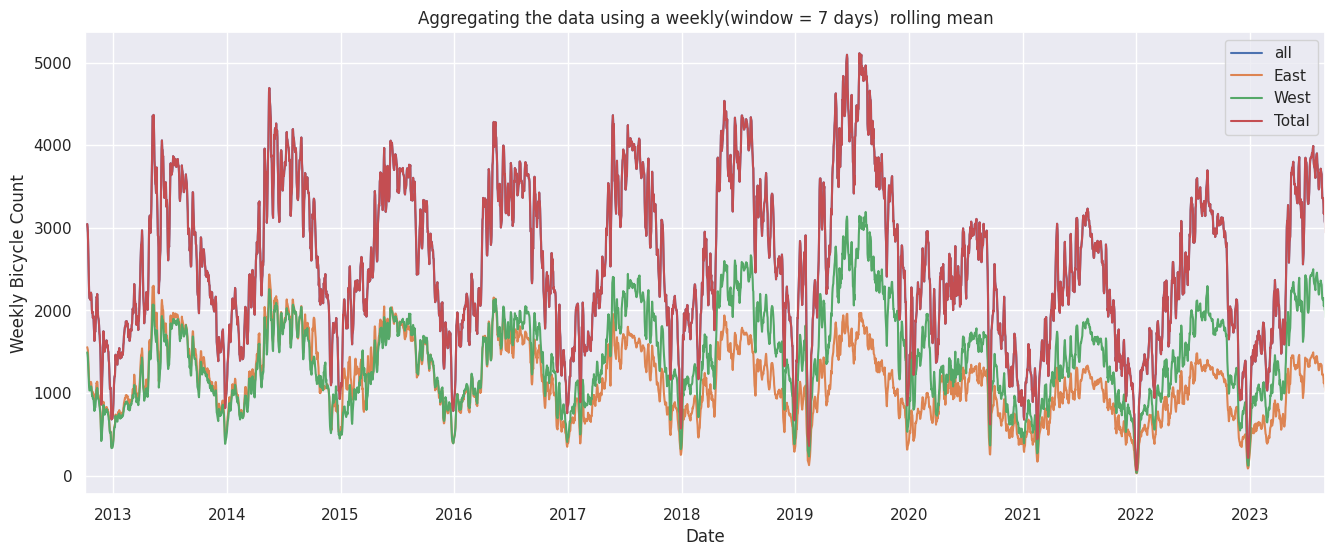

In [18]:
# The same weekly  plot can be pllot from daily dataset like below
fb_daily.rolling(window=7).mean().plot(kind='line', figsize=(16,6))
plt.title('Aggregating the data using a weekly(window = 7 days)  rolling mean')
plt.ylabel('Weekly Bicycle Count')
plt.show()

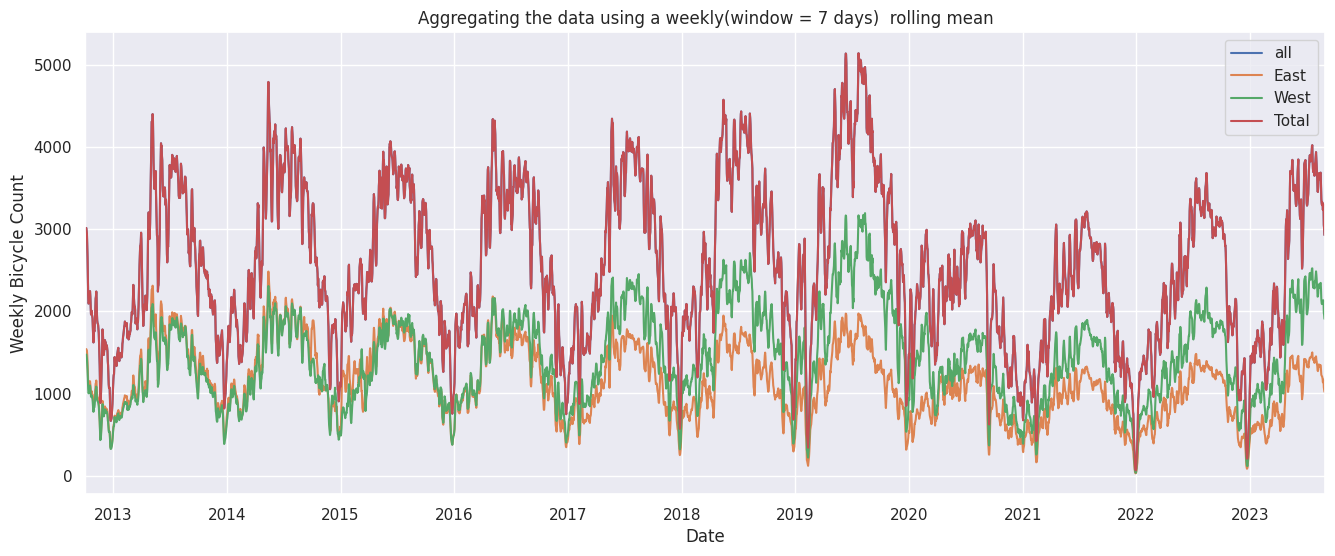

In [19]:
# The jaggedness of the result is due to the hard cutoff of the window.
# We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window.
# The above weekly plot is a little jagged and can be smoothened like below:
# The following code specifies both the width of the window (we chose 7 days) and
# the width of the Gaussian within the window (we chose 3 days):
fb_daily.rolling(window=7, center=True, win_type='gaussian').mean(std=5).plot(figsize=(16,6))
plt.title('Aggregating the data using a weekly(window = 7 days)  rolling mean')
plt.ylabel('Weekly Bicycle Count')
plt.show()
# Observation: Smoothening isn't really so good in this case, likee how it used to be :-/

Hourly Ticks : [    0  3600  7200 10800 14400 18000 21600 25200 28800 32400 36000 39600
 43200 46800 50400 54000 57600 61200 64800 68400 72000 75600 79200 82800]


(array([    0,  3600,  7200, 10800, 14400, 18000, 21600, 25200, 28800,
        32400, 36000, 39600, 43200, 46800, 50400, 54000, 57600, 61200,
        64800, 68400, 72000, 75600, 79200, 82800]),
 [Text(0, 0, '00:00'),
  Text(3600, 0, '01:00'),
  Text(7200, 0, '02:00'),
  Text(10800, 0, '03:00'),
  Text(14400, 0, '04:00'),
  Text(18000, 0, '05:00'),
  Text(21600, 0, '06:00'),
  Text(25200, 0, '07:00'),
  Text(28800, 0, '08:00'),
  Text(32400, 0, '09:00'),
  Text(36000, 0, '10:00'),
  Text(39600, 0, '11:00'),
  Text(43200, 0, '12:00'),
  Text(46800, 0, '13:00'),
  Text(50400, 0, '14:00'),
  Text(54000, 0, '15:00'),
  Text(57600, 0, '16:00'),
  Text(61200, 0, '17:00'),
  Text(64800, 0, '18:00'),
  Text(68400, 0, '19:00'),
  Text(72000, 0, '20:00'),
  Text(75600, 0, '21:00'),
  Text(79200, 0, '22:00'),
  Text(82800, 0, '23:00')])

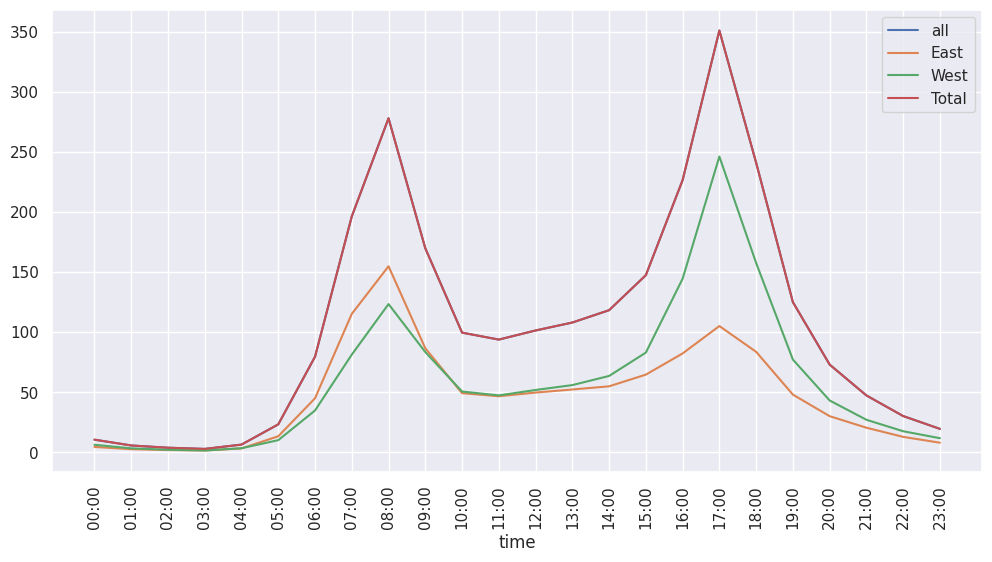

In [20]:
# We might want to look at the average traffic as a function of the time of day.
gby_time = fb.groupby(fb.index.time).mean()
hourly_ticks = 60 * 60 * np.arange(24)
print('Hourly Ticks :', hourly_ticks)
gby_time.plot(xticks=hourly_ticks,figsize=(12,6))
plt.xticks(rotation='vertical')
# Observation: The hourly traffic is a strongly bimodal distribution (do yu see 2 mountains in the graph?),
# with peaks around 8:00 in the morning and 5:00 in the evening.

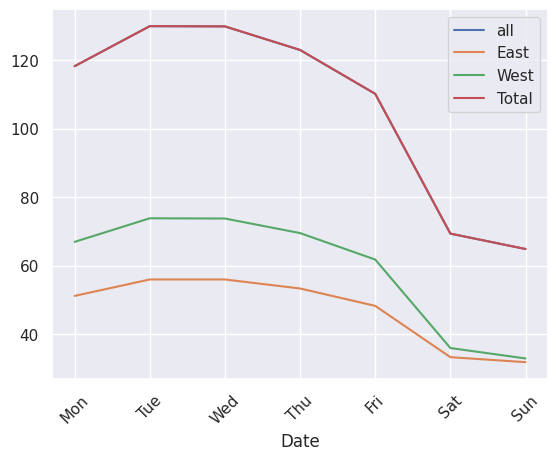

In [21]:
# We also might be curious about how things change based on the day of the week.
# Again, we can do this with a simple groupby
gby_week = fb.groupby(fb.index.dayofweek).mean()
# print(gby_week)
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# print('gby_week index =',gby_week.index.tolist())
# gby_week.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# print('gby_week index =',gby_week.index.tolist())
gby_week.plot()
plt.xticks(range(len(weekdays)),weekdays, rotation=45)
plt.show()
# Observation: This shows a strong distinction between weekday and weekend totals,
# with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

In [22]:
weekday_mask = np.where(fb_daily.index.weekday < 5, 'Weekday', 'Weekend') # 5 and 6 are Sat and Sun => Weekend
len(weekday_mask)
weekday_mask

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekday'], dtype='<U7')

In [23]:
# See how the hourly trend looks like between weekdays and weekends
# Now that  means we arer grouping-by weekday-mask and hourly-time
weekday_mask = np.where(fb.index.weekday < 5, 'weekday','weekend')
gby_hourly = fb.groupby([weekday_mask,fb.index.time]).mean()
gby_hourly

all        East        West       Total
weekday 00:00:00    8.399859    3.498946    4.900914    8.399859
        01:00:00    4.166550    1.827829    2.338721    4.166550
        02:00:00    2.813774    1.357695    1.456079    2.813774
        03:00:00    2.397400    1.195713    1.201687    2.397400
        04:00:00    7.279691    3.671820    3.607871    7.279691
        05:00:00   29.476810   17.009136   12.467674   29.476810
        06:00:00  104.389670   59.676037   44.713633  104.389670
        07:00:00  261.835559  154.841181  106.994378  261.835559
        08:00:00  365.257203  204.693254  160.563949  365.257203
        09:00:00  203.796485  104.168717   99.627768  203.796485
        10:00:00   96.605975   47.273462   49.332513   96.605975
        11:00:00   78.789881   38.979269   39.810611   78.789881
        12:00:00   83.571680   40.533380   43.038299   83.571680
        13:00:00   89.631893   42.531085   47.100808   89.631893
        14:00:00  102.055848   45.407446   56.648402  102.055848
        15:00:00  144.221637   59.551106   84.670530  144.221637
        16:00:00  260.495258   87.341763  173.153495  260.495258
        17:00:00  445.234633  124.604847  320.629786  445.234633
        18:00:00  301.731296   99.688795  202.042501  301.731296
        19:00:00  149.380049   55.314015   94.066034  149.380049
        20:00:00   84.692659   33.854935   50.837724   84.692659
        21:00:00   52.961363   22.883386   30.077977   52.961363
        22:00:00   33.160169   13.881630   19.278539   33.160169
        23:00:00   20.419389    8.187215   12.232174   20.419389
weekend 00:00:00   15.136204    6.145870    8.990334   15.136204
        01:00:00    8.761863    3.782953    4.978910    8.761863
        02:00:00    5.629104    2.540373    3.088731    5.629104
        03:00:00    3.204745    1.548330    1.656415    3.204745
        04:00:00    3.536028    1.404218    2.131810    3.536028
        05:00:00    6.993849    3.485940    3.507909    6.993849
        06:00:00   16.895431    7.530756    9.364675   16.895431
        07:00:00   32.231986   15.679262   16.552724   32.231986
        08:00:00   59.825132   29.837434   29.987698   59.825132
        09:00:00   84.555360   42.101054   42.454306   84.555360
        10:00:00  106.594903   53.494728   53.100176  106.594903
        11:00:00  130.878735   65.234622   65.644112  130.878735
        12:00:00  145.514060   72.149385   73.364675  145.514060
        13:00:00  153.522847   76.057996   77.464851  153.522847
        14:00:00  158.410369   78.163445   80.246924  158.410369
        15:00:00  155.109842   76.862039   78.247803  155.109842
        16:00:00  141.400703   69.095782   72.304921  141.400703
        17:00:00  115.641476   55.785589   59.855888  115.641476
        18:00:00   89.103691   42.963972   46.139719   89.103691
        19:00:00   63.558875   29.152900   34.405975   63.558875
        20:00:00   43.248682   19.959578   23.289104   43.248682
        21:00:00   32.621265   13.732865   18.888401   32.621265
        22:00:00   22.069420    9.560633   12.508787   22.069420
        23:00:00   16.538664    6.756591    9.782074   16.538664

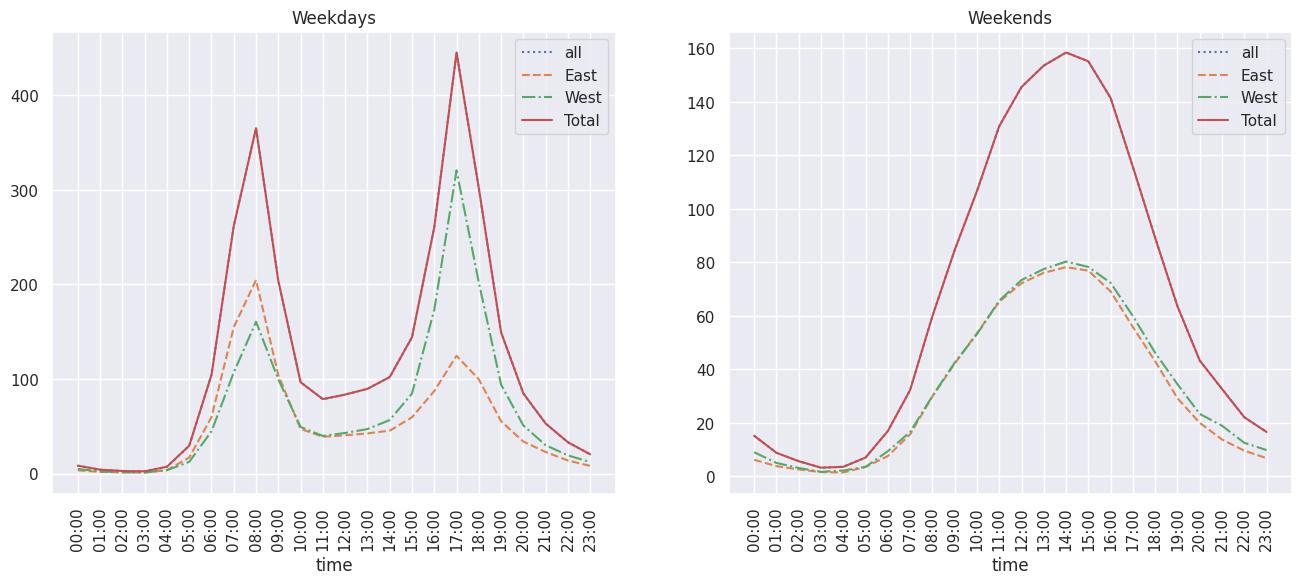

In [24]:
hourly_ticks = 60 * 60 * np.arange(24)
fig, ax = plt.subplots(1,2,figsize=(16,6))
gby_hourly.loc['weekday',:].plot(ax=ax[0], xticks=hourly_ticks, title='Weekdays', style=[':','--','-.'])
gby_hourly.loc['weekend',:].plot(ax=ax[1], xticks=hourly_ticks, title='Weekends', style=[':','--','-.'])


# plt.xticks(rotation=90) only affects the last subplot whose reference is active
# To change the xticks on every sub-plot
for x in ax:
    x.xaxis.set_tick_params(rotation=90)

# Observation: We see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
# It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people’s commuting patterns

# Data Wrangling by merging Datasets (Fremont Bridge and Weather Data)

In [26]:
# Load Daily Weather data of Fremont Bridge
wd = pd.read_csv('data/1404899.csv', index_col='DATE', parse_dates=True)

In [27]:
wd.shape

(2097, 25)

In [28]:
fb_daily.shape # The number of days/rows match in both datasets - fb_daily and wd

(3985, 4)

In [29]:
wd.head(5)

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT02,WT03,WT04,WT05,WT08,WT13,WT14,WT16,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",16.33,NaN,0.0,0.0,0.0,NaN,66,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",14.54,NaN,0.0,0.0,0.0,NaN,66,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",12.75,NaN,0.0,0.0,0.0,NaN,71,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",11.41,NaN,0.0,0.0,0.0,NaN,75,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2.91,NaN,0.0,0.0,0.0,NaN,75,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
wd.columns

Index(['STATION', 'NAME', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT08', 'WT13', 'WT14', 'WT16', 'WT18', 'WT22'],
      dtype='object')

In [31]:
wd[['STATION','NAME','PRCP','SNOW','TMAX','TMIN']].isnull().sum()

STATION    0
NAME       0
PRCP       0
SNOW       0
TMAX       0
TMIN       0
dtype: int64

In [32]:
wd = wd.filter(['STATION','NAME','PRCP','SNOW','TMAX','TMIN'], axis=1)
wd.head(5)

,STATION,NAME,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,66,46
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,66,47
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,71,48
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,75,46
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,75,46


In [33]:
# How Snowy days are recorded? how do the values look like?
np.sort( wd.SNOW.unique() ) # So the values range between 0 and 5.1

array([0. , 0.1, 0.4, 0.5, 0.6, 0.8, 1. , 1.1, 1.6, 2. , 2.9, 3. , 5.1])

In [34]:
np.sort( wd.PRCP.unique() ) # So the values range between 0 and 2.2

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.7 , 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.79,
       0.8 , 0.81, 0.82, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.91, 0.93,
       0.94, 1.  , 1.03, 1.04, 1.05, 1.08, 1.09, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.18, 1.19, 1.2 , 1.21, 1.23, 1.26, 1.27, 1.28, 1.3 , 1.31,
       1.32, 1.35, 1.36, 1.4 , 1.5 , 1.51, 1.54, 1.61, 1.63, 1.7 , 1.71,
       1.74, 1.75, 1.84, 1.86, 2.13, 2.2 ])

In [35]:
wd.loc[ (wd['SNOW'] > 0) & (wd['PRCP'] == 0) ] # No rows available. So, the precipitation (PRCP) cannot be 0, when it Snows (SNOW > 0).

,STATION,NAME,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,


In [36]:
# df = fb_daily['Total'].copy()
df = fb_daily.filter(['Total'], axis=1)
print('Shape : ',df.shape)
df.head(5)

Shape :  (3985, 1)


,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


#### Feature Engineering : Categorical Values
* We saw previously that the patterns of use generally vary from day to day; let’s account for this in our data by adding binary columns that indicate the day of the week.
* Similarly, we might expect riders to behave differently on holidays; let’s add an indicator of this as well.

In [37]:
print(weekdays)
print(list(range(7)))

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
[0, 1, 2, 3, 4, 5, 6]


In [38]:
# Feature  Engineering : Categorical Values : adding binary columns that indicate the day of the week
for i in range(7):
    df[weekdays[i]] = (df.index.weekday ==  i).astype(int)
df.head(7)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0
2012-10-04,3475.0,0,0,0,1,0,0,0
2012-10-05,3148.0,0,0,0,0,1,0,0
2012-10-06,2006.0,0,0,0,0,0,1,0
2012-10-07,2142.0,0,0,0,0,0,0,1
2012-10-08,3537.0,1,0,0,0,0,0,0
2012-10-09,3501.0,0,1,0,0,0,0,0


In [39]:
# df.columns['Total'] = df.columns['TotalBikesCount']
df = df.rename(columns={'Total':'TotalBikesCount'})
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0
2012-10-04,3475.0,0,0,0,1,0,0,0
2012-10-05,3148.0,0,0,0,0,1,0,0
2012-10-06,2006.0,0,0,0,0,0,1,0
2012-10-07,2142.0,0,0,0,0,0,0,1


In [40]:
# Assuming, riders to behave differently on holidays.; we add an indicator for this by incorporating National Holiday Calendar:
from pandas.tseries.holiday import USFederalHolidayCalendar # Can't believe panda has a class for this!
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2018')
df = df.join(pd.Series(1, index=holidays, name='holiday'))
df['holiday'].fillna(0, inplace=True)
df.head()

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0.0
2012-10-04,3475.0,0,0,0,1,0,0,0,0.0
2012-10-05,3148.0,0,0,0,0,1,0,0,0.0
2012-10-06,2006.0,0,0,0,0,0,1,0,0.0
2012-10-07,2142.0,0,0,0,0,0,0,1,0.0


In [41]:
# df.drop(['holiday'], axis=1, inplace=True)
df['holiday'] = df['holiday'].astype(int)

In [42]:
df['holiday'].unique()

array([0, 1])

### Accounting for the Duration of Daylight

In [43]:
# We also suspect that the hours of daylight would affect how many people ride;
# let’s use the standard astronomical calculation to add this information
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

<ipython-input-43-46bdee76ba7c>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


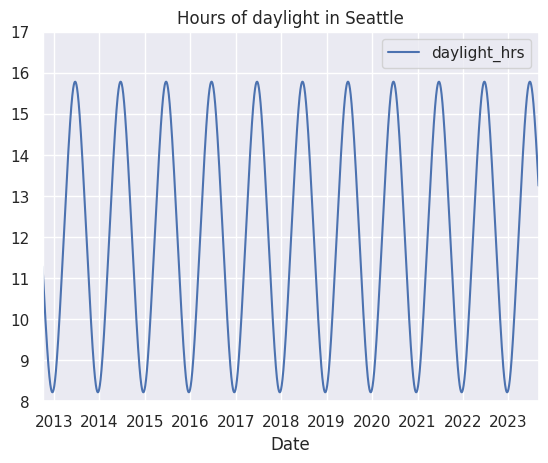

In [44]:
df['daylight_hrs'] = list(map(hours_of_daylight, df.index))
df[['daylight_hrs']].plot(fig=(16,4))
plt.ylim(8,17) # Increased y-axis limit max range by 1. Helps in placing the legend neatly without overlapping on the curve
plt.legend(loc='upper right')
plt.title('Hours of daylight in Seattle')
plt.show()
# Observation: The daylight varies between ~8 hrs (during Dececmber) and ~16 hrs (June).

In [45]:
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs
Date,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359
2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142
2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038
2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056
2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208


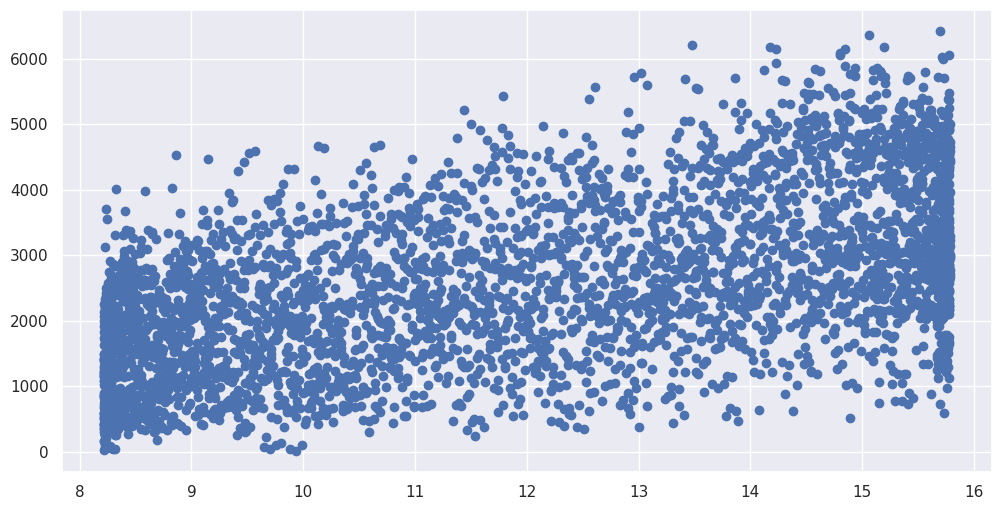

In [46]:
# Does day-light duration affect bicycle traffic? Let's validate that assumption with scatter plot.

# Plotting with Seaborn
# sns.lmplot('daylight_hrs','TotalBikesCount',data=df, fit_reg=False, size=5, scatter=True)

# plotting with Matplotlib
# plt.plot(df['daylight_hrs'],df['TotalBikesCount'])
plt.figure(figsize=(12,6)) # This should be set before drawing the plot
plt.scatter(df['daylight_hrs'],df['TotalBikesCount'])
plt.show()
# While see that our assumption turning out to be truthy, we see the plot too dense with data.

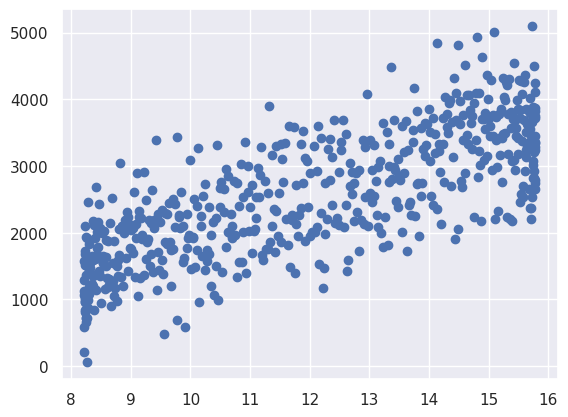

In [47]:
# Drawing the plot with resampled data
weekly = df.resample('W').mean()
# weekly.head()
plt.scatter(weekly['daylight_hrs'],weekly['TotalBikesCount'])
# So this clears the density to a large extent and we can see the trruthiness of our assumption - More daylight hours, more traffic

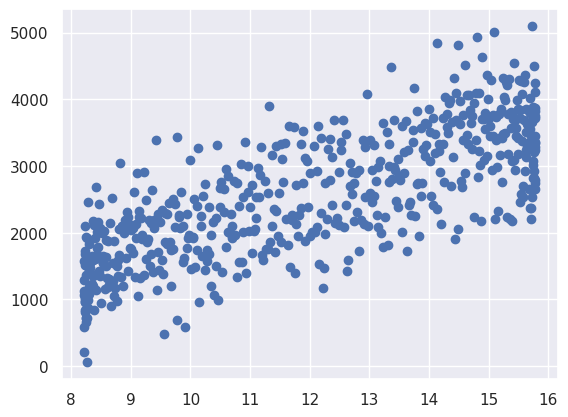

In [48]:
# sample = df.sample(n=500)
sample = df.sample(frac=0.1) # 10% of data ffrom the df
plt.scatter(weekly['daylight_hrs'],weekly['TotalBikesCount'])

In [49]:
# Can we see how the change in the duration affects the cycle traffic quantitatively?
# We can with LR's coefficient
from sklearn.linear_model import LinearRegression

x = sample[['daylight_hrs']]
y = sample['TotalBikesCount']
clf = LinearRegression(fit_intercept=True).fit(x, y)
ypred = clf.predict(x)
print(clf.coef_) # OP: ~295
# Now that means on any given day, each extra hour of daylight leads to about 300 more cyclers using the bridge

[272.3048112]


#### Now be a data scientist and ask yourself?

So is the seasonal increase daylight duration the real factor for the rise in bicyclers?
Or do we actually see a trend in the rise in bicyclers?
The way we can find answers to this is by doing a de-trending on the data.

This is what I mean by "de-trended" data. We've basically removed the component of the data which correlates with the number of hours in a day, so that what is left is in some way agnostic to this quantity. The "adjusted weekly count" plotted here can be thought of as the number of cyclists we'd expect to see if the hours of daylight were not a factor.

**With the data de-trended, we get a better idea of how bicycling in Seattle has changed over time, corrected for the seasonal variation.**

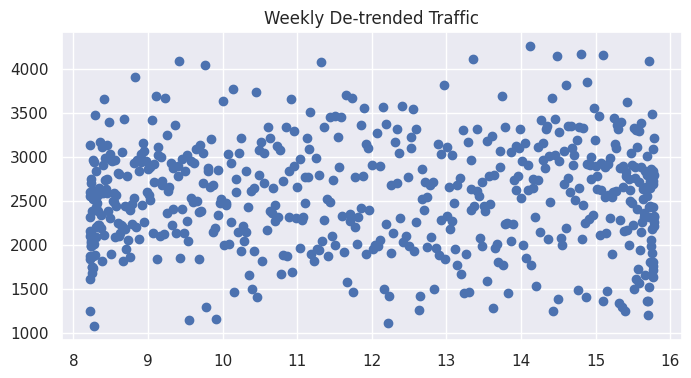

In [50]:
# Now that we have fit this trend, let's subtract it off and replace it by the mean:
trend = clf.predict(weekly[['daylight_hrs']]) # Trend is the weekly-predictions
detrended = trend.mean() + (weekly['TotalBikesCount'] - trend )
plt.figure(figsize=(8,4))
plt.scatter(weekly['daylight_hrs'],detrended)
plt.title('Weekly De-trended Traffic')
plt.show()

<Axes: xlabel='Date'>

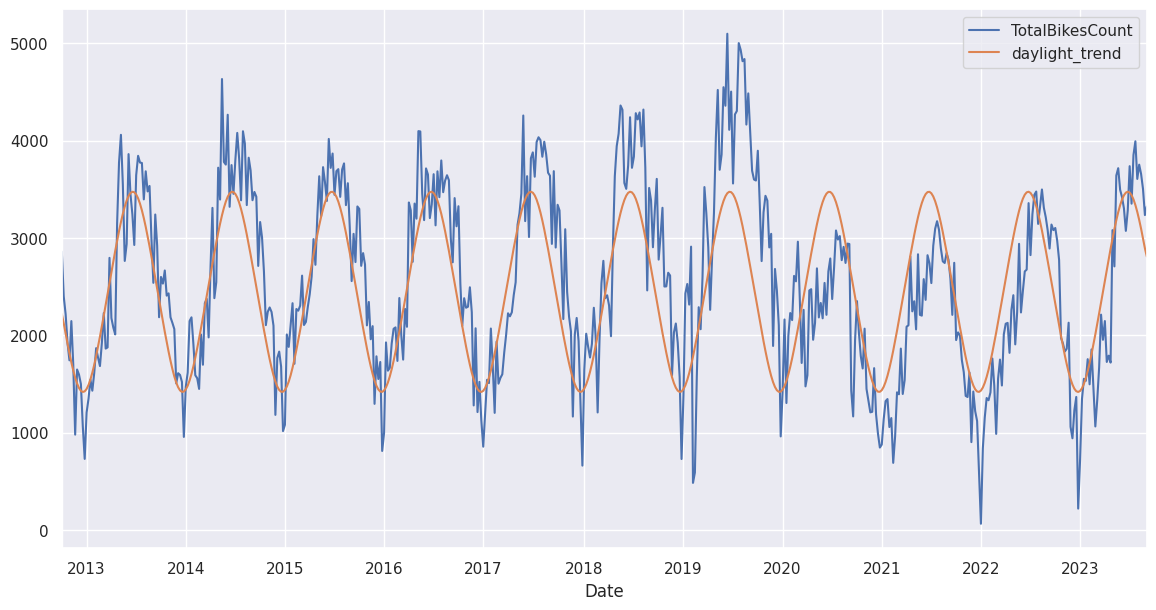

In [51]:
# Let's visualize this another way. in 2 steps.
# Step 1: Instead of plotting the number of riders vs daylight hours,
# we'll again plot the number of riders vs the day of the year, along with the trend
weekly['daylight_trend'] = trend
weekly[['TotalBikesCount','daylight_trend']].plot(figsize=(14,7))

The STD of the detrended cyclists is 609


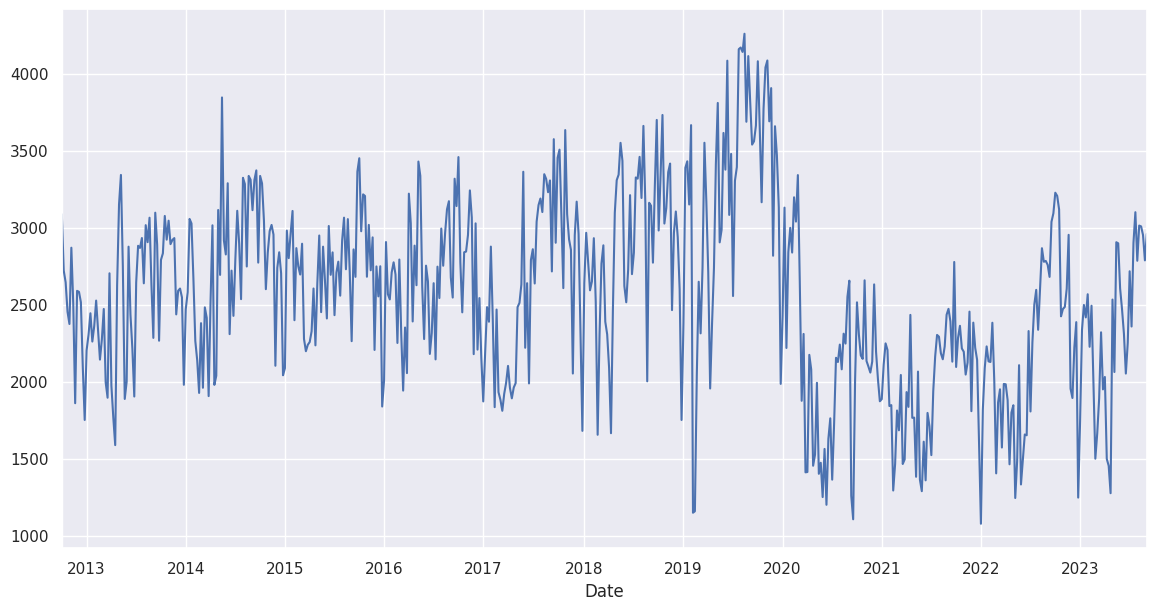

In [52]:
# Step 2: We can similarly view the adjusted total number of riders over time by subtracting this green line from the blue line:
detrended.plot(figsize=(14,7))
print('The STD of the detrended cyclists is {0:.0f}'.format(detrended.std()))

In [53]:
# Adding average temperature
# # temperatures are in 1/10 deg C; convert to C
tmin = wd['TMIN'] / 10
tmax = wd['TMAX'] / 10
wd['AvgTempInC'] = (tmin + tmax) / 2
df = df.join(wd['AvgTempInC'])
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,AvgTempInC
Date,,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60
2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65
2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95
2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05
2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05


In [54]:
# precip is in 1/10 mm; convert to inches
wd['PRCP_IN'] = wd['PRCP'] / 254
wd['DryDay'] = (wd['PRCP'] == 0).astype(int)
df = df.join(wd[['PRCP_IN','DryDay']])
df.head(15)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,AvgTempInC,PRCP_IN,DryDay
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.000000,1.0
2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.000000,1.0
2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.000000,1.0
2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.000000,1.0
2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.000000,1.0
2012-10-08,3537.0,1,0,0,0,0,0,0,1,10.987503,5.80,0.000000,1.0
2012-10-09,3501.0,0,1,0,0,0,0,0,0,10.929950,5.45,0.000000,1.0
2012-10-10,3235.0,0,0,1,0,0,0,0,0,10.872560,5.05,0.000000,1.0
2012-10-11,3047.0,0,0,0,1,0,0,0,0,10.815345,5.10,0.000000,1.0


In [55]:
df = df.rename(columns={'daylight_hrs':'DayLightHrs'})
df.columns

Index(['TotalBikesCount', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
       'holiday', 'DayLightHrs', 'AvgTempInC', 'PRCP_IN', 'DryDay'],
      dtype='object')

In [56]:
# Finally, let’s add a counter that increases from day 1, and measures how many years have passed.
# This will let us measure any observed annual increase or decrease in daily crossings:
df['YearsCount'] = (df.index - df.index[0]).days / 365.
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1.0,0.000000
2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1.0,0.002740
2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1.0,0.005479
2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1.0,0.008219
2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1.0,0.010959


#### Persist Processed Data

In [57]:
df = df.reset_index()
df.head(5)

,Date,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
0,2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1.0,0.000000
1,2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1.0,0.002740
2,2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1.0,0.005479
3,2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1.0,0.008219
4,2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1.0,0.010959


In [58]:
df.to_csv('data/processed_data.csv')